<a href="https://colab.research.google.com/github/Meenzm/AIProject/blob/main/Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3730 - loss: 2.0888 - val_accuracy: 0.9700 - val_loss: 0.5023
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9982 - loss: 0.2219 - val_accuracy: 1.0000 - val_loss: 0.0165
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.4393e-04
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 7.6958e-04 - val_accu

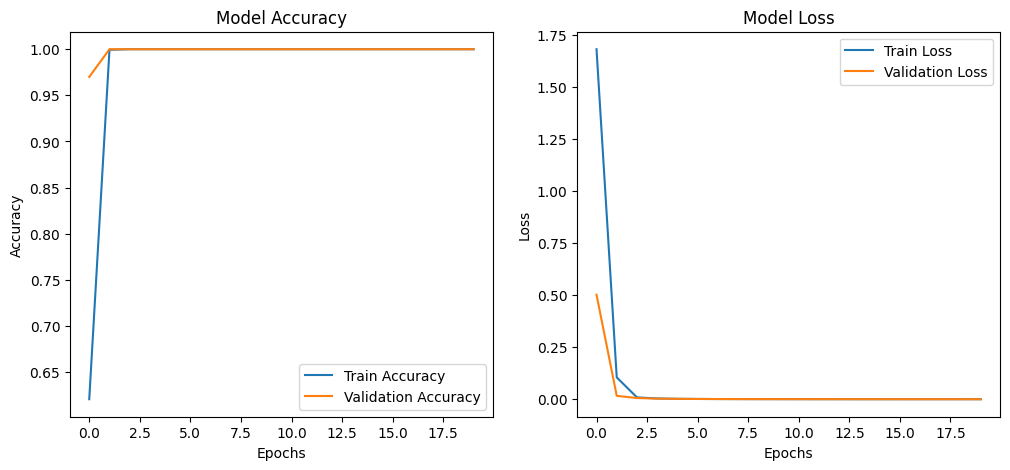

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Sample Predictions:
ไป Egypt เพื่อทำกิจกรรม: Festive Heritage
ไป Brazil เพื่อทำกิจกรรม: Festive Heritage
ไป Russia เพื่อทำกิจกรรม: Tropical Paradise
ไป India เพื่อทำกิจกรรม: Cultural Hotspot
ไป Argentina เพื่อทำกิจกรรม: Historical Marvel
ไป Australia เพื่อทำกิจกรรม: Tropical Paradise
ไป South Africa เพื่อทำกิจกรรม: Metropolitan Elegance
ไป UAE เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Canada เพื่อทำกิจกรรม: Metropolitan Elegance
ไป Brazil เพื่อทำกิจกรรม: Tropical Paradise


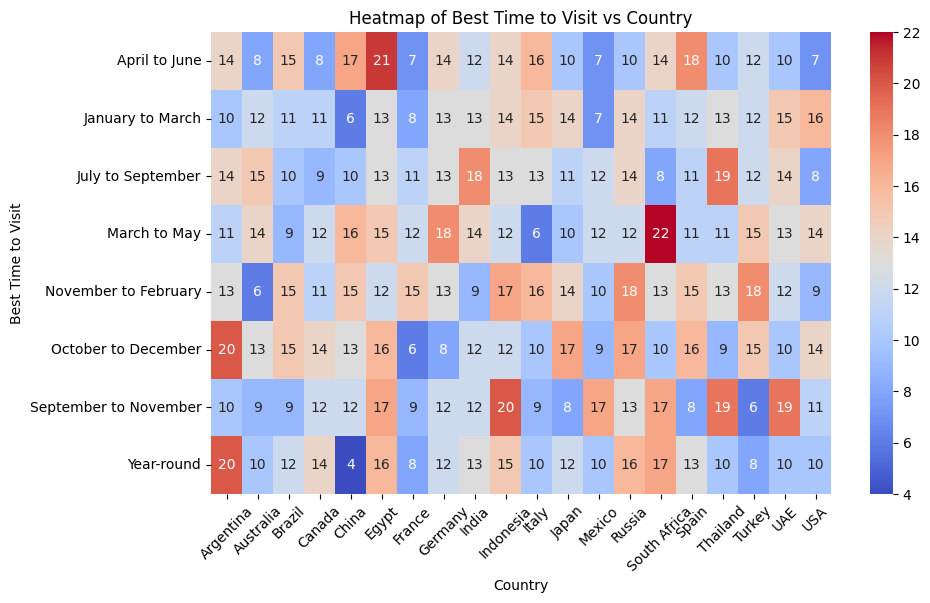

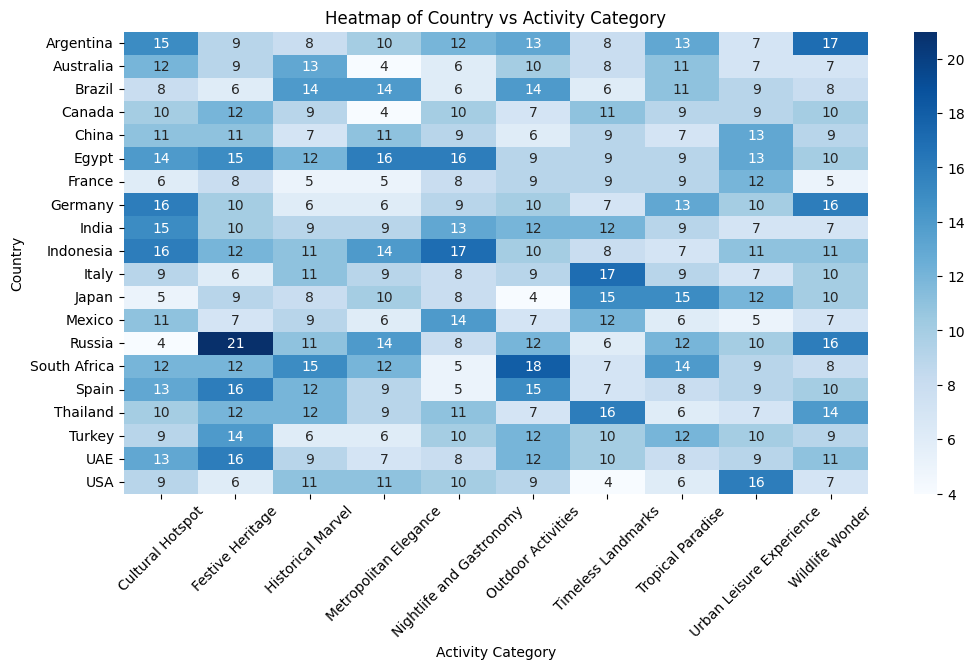

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
file_path = "/Updated_Tourist_OneHot.csv"
df = pd.read_csv(file_path)

# Select features and target
features = ["Country", "Famous Attraction", "Best Time to Visit", "Attractive Activities"]
target = "Activity Category"

# One-Hot Encode 'Best Time to Visit' and other categorical features
df_encoded = pd.get_dummies(df[features], columns=["Country", "Famous Attraction", "Best Time to Visit", "Attractive Activities"])

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Define FNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer with the number of categories
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

# Display some predictions
sample_size = 10
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
print("Sample Predictions:")
for idx in sample_indices:
    country = df.iloc[idx]['Country']
    activity = predicted_labels[idx]
    print(f"ไป {country} เพื่อทำกิจกรรม: {activity}")

# Create heatmap for Best Time to Visit vs Country
plt.figure(figsize=(10, 6))
pivot_table_season_country = df.pivot_table(index='Best Time to Visit', columns='Country', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table_season_country, cmap='coolwarm', annot=True, fmt="d")
plt.title('Heatmap of Best Time to Visit vs Country')
plt.xlabel('Country')
plt.ylabel('Best Time to Visit')
plt.xticks(rotation=45)
plt.show()

# Create heatmap for Country vs Activity Category
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index='Country', columns='Activity Category', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt="d")
plt.title('Heatmap of Country vs Activity Category')
plt.xlabel('Activity Category')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()
